Naufal Afthar Razzan - 2440083134 - LB01

In [3]:
import pandas as pd

sosnet = pd.read_csv('Social_Network_Ads.csv')
sosnet.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


array([[<AxesSubplot:title={'center':'Purchased'}>]], dtype=object)

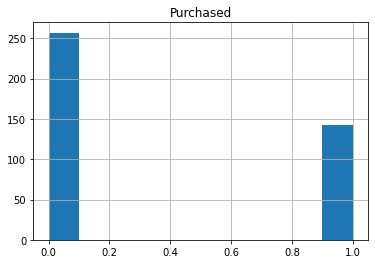

In [6]:
# visualiasi data dependent variable
sosnet.hist(column = 'Purchased')

In [41]:
# feature set & labels
x = sosnet[['Age', 'EstimatedSalary']]
y = sosnet['Purchased']

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0, :]

array([-1.78179743, -1.49004624])

In [23]:
# split training & test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Test set: ', x_test.shape, y_test.shape)

Training set:  (320, 2) (320,)
Test set:  (80, 2) (80,)


In [26]:
# K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# nilai k akan menggunakan akar pangkat dari jumlah data, yaitu k = 20
neigh = KNeighborsClassifier(n_neighbors = 40).fit(x_train, y_train)
pred_y = neigh.predict(x_test)
c_matrix = metrics.confusion_matrix(y_test, pred_y)
print('Accuracy score with confusion matrix:\n')
print(c_matrix)

Accuracy score with confusion matrix:

[[49  3]
 [ 2 26]]


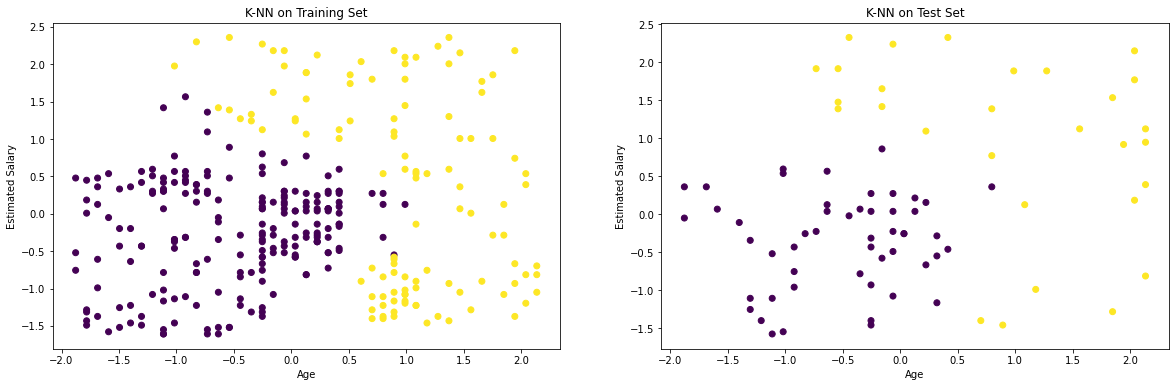

In [46]:
# visualisasi training dan test set
train_pred = neigh.predict(x_train)

import matplotlib.pyplot as plt
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c = train_pred, label = train_pred)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('K-NN on Training Set')
plt.subplot(1, 2, 2)
plt.scatter(x_test[:, 0], x_test[:, 1], c = pred_y, label = pred_y)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('K-NN on Test Set')
plt.show()